# VPN multiclass classification using Network Traffic Classification based on Single Flow Time Series Analysis 

Problem: multiclass classification of VPN

Raw data from: VNAT  [1]

-----------------------------------------------------------------------
[1] Steven Jorgensen et al. Extensible Machine Learning for Encrypted Network Traffic Application Labeling via Uncertainty Quantification. CoRR, abs/2205.05628, 2022.

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [2]:
df = pd.read_csv("../cnsm_final_datasets/vpn_vnat_multiclass.csv")

In [3]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

statistics_features = [
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
]
distribution_features = [
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
]
time_features = [
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    ]
behavior_features = [
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
]
frequency_features = [
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "MEDIAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "Q1",
    "Q3",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "MODE",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "PERCENT_BELOW_MEAN",
    "PERCENT_ABOVE_MEAN",
    "PEARSON_SK1_SKEWNESS",
    "PEARSON_SK2_SKEWNESS",
    "FISHER_MI_3_SKEWNESS",
    "FISHER_PEARSON_g1_SKEWNESS",
    "FISHER_PEARSON_G1_SKEWNESS",
    "GALTON_SKEWNESS",
    "KURTOSIS",
    "ENTROPY",
    "SCALED_ENTROPY",
    "HURST_EXPONENT",
    "BENFORD_LAW_PRESENTED",
    "P_BENFORD",
    "NORMAL_DISTRIBUTION",
    "CNT_DISTRIBUTION",
    "TIME_DISTRIBUTION",
    "AREA_VALUES_DISTRIBUTION",
    "MEAN_SCALED_TIME",
    "MEDIAN_SCALED_TIME",
    "Q1_SCALED_TIME",
    "Q3_SCALED_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MEDIAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "MEAN_SCALED_DIFFTIMES",
    "SIG_SPACES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
    "TRANSIENTS",
    "CNT_ZEROS",
    "CNT_NZ_DISTRIBUTION",
    "BIGGEST_CNT_1_SEC",
    "PERIODICITY",
    "VAL",
    "TIME",
    "MIN_POWER",
    "MAX_POWER",
    "MIN_POWER_FREQ",
    "MAX_POWER_FREQ",
    "SPECTRAL_ENERGY",
    "SPECTRAL_ENTROPY",
    "SPECTRAL_KURTOSIS",
    "SPECTRAL_SKEWNESS",
    "SPECTRAL_ROLLOFF",
    "SPECTRAL_CENTROID",
    "SPECTRAL_SPREAD",
    "SPECTRAL_SLOPE",
    "SPECTRAL_CREST",
    "SPECTRAL_FLUX",
    "SPECTRAL_BANDWIDTH",
    "PERIODICITY_SCDF",
]

In [4]:
import sklearn
pd.set_option('display.max_columns', None)


def handle_df(df):
    df['LABEL'] = df.LABEL.astype('category')
    df["LABEL_code"] = df["LABEL"].cat.codes

    bool_features = ["TRANSIENTS", "BENFORD_LAW_PRESENTED", "SIG_SPACES", "PERIODICITY","PERIODICITY_SCDF"]


    for F in features:
        if F in bool_features:
            continue
        if F in distribution_features:
            df.replace([np.inf], 0.5, inplace=True)
            df.replace([-np.inf], 0.5, inplace=True)
            df.loc[df[F].isnull(), F] = 0.5
        elif F in ["DIRECTIONS","NORMAL_DISTRIBUTION"]: 
            df.replace([np.inf], 0.5, inplace=True)
            df.replace([-np.inf], 0.5, inplace=True)
            df.loc[df[F].isnull(), F] = 0.5
        # elif F in frequency_features: 
        #     df.replace([np.inf], -1, inplace=True)
        #     df.replace([-np.inf], -1, inplace=True)
        #     df.loc[df[F].isnull(), F] = -1
        # else:
        #     df.replace([np.inf], 0, inplace=True)
        #     df.replace([-np.inf], 0, inplace=True)
        #     df.loc[df[F].isnull(), F] = 0


    for F in bool_features:
        df.loc[df[F].isnull(), F] = False
        df[F] = df[F].astype('bool')
    
    return df

df = handle_df(df)

In [5]:
df

,Unnamed: 0,DST_IP,SRC_IP,PACKETS,PACKETS_REV,BYTES,BYTES_REV,TIME_FIRST,TIME_LAST,DST_PORT,SRC_PORT,MEAN,MEDIAN,STDEV,VAR,BURSTINESS,Q1,Q3,MIN,MAX,MIN_MINUS_MAX,MODE,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,PERCENT_BELOW_MEAN,PERCENT_ABOVE_MEAN,PEARSON_SK1_SKEWNESS,PEARSON_SK2_SKEWNESS,FISHER_MI_3_SKEWNESS,FISHER_PEARSON_g1_SKEWNESS,FISHER_PEARSON_G1_SKEWNESS,GALTON_SKEWNESS,KURTOSIS,ENTROPY,SCALED_ENTROPY,HURST_EXPONENT,BENFORD_LAW_PRESENTED,P_BENFORD,NORMAL_DISTRIBUTION,CNT_DISTRIBUTION,TIME_DISTRIBUTION,AREA_VALUES_DISTRIBUTION,MEAN_SCALED_TIME,MEDIAN_SCALED_TIME,Q1_SCALED_TIME,Q3_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MEDIAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,MEAN_SCALED_DIFFTIMES,SIG_SPACES,SWITCHING_METRIC,TRANSIENTS,CNT_ZEROS,CNT_NZ_DISTRIBUTION,BIGGEST_CNT_1_SEC,DIRECTIONS,PERIODICITY,VAL,TIME,MIN_POWER,MAX_POWER,MIN_POWER_FREQ,MAX_POWER_FREQ,SPECTRAL_ENERGY,SPECTRAL_ENTROPY,SPECTRAL_KURTOSIS,SPECTRAL_SKEWNESS,SPECTRAL_ROLLOFF,SPECTRAL_CENTROID,SPECTRAL_SPREAD,SPECTRAL_SLOPE,SPECTRAL_CREST,SPECTRAL_FLUX,SPECTRAL_BANDWIDTH,PERIODICITY_SCDF,LABEL,LABEL_code
0,0,10.124.1.194.,10.122.1.103,714,0,549366,0,1.561555e+09,1.561556e+09,3128,54882,829,1386.0,622.770423,387843,-0.142054,60.0,1386.0,60,1386,1326,1386,75.123091,600,72.376357,1036.936801,0.418768,0.579832,-0.894391,1.767907,-0.327279,1.739559e-09,1.743223e-09,-0.159879,1.180965,2.372538,0.250274,0.555177,False,0.582864,0.004423,0.530151,0.188414,0.966593,55.468254,55.475156,17.007178,66.444639,294.394870,0.412896,0.000041,1.883507e-05,45.051412,0.009165,False,0.718093,False,0.0,0.530151,434065,1.000000,False,0,0.000000,4.058377e-06,0.084923,0.282019,0.631871,92.117523,481.228346,19151.262768,5778.762017,0.630083,0.538168,0.274181,0.271494,4.609472,2.987839,0.349852,False,STREAMING,3
1,1,10.122.1.103.,10.124.1.194,692,0,408450,0,1.561555e+09,1.561556e+09,54882,3128,650,182.0,630.866864,397993,-0.014938,60.0,1386.0,60,1386,1326,60,97.056441,614,94.461538,905.669718,0.552023,0.447977,0.935221,2.802493,0.230741,9.784298e-10,9.805566e-10,0.110106,1.117196,2.216914,0.234976,0.554134,False,0.575387,0.001000,0.534872,0.156677,0.954963,46.124970,37.782275,12.127213,59.545836,294.394912,0.426042,0.000041,9.536743e-07,45.051844,0.009457,False,0.683068,True,0.0,0.534872,353983,1.000000,False,0,0.000000,3.977512e-06,0.075795,0.984504,0.568496,95.112819,492.754509,16633.616393,5180.353548,0.483864,0.540962,0.251544,0.352665,3.984490,2.452436,-0.416008,False,STREAMING,3
2,2,10.124.1.194.,10.122.1.103,3410,0,56663,0,1.561555e+09,1.561556e+09,3128,54914,76,60.0,110.535062,12219,0.185140,60.0,60.0,60,838,778,60,145.440871,31,40.789474,134.481224,0.977419,0.022581,0.144750,1.519880,6.570258,4.566513e-07,4.568523e-07,0.000000,44.212782,0.214118,0.018245,0.562904,False,0.322291,0.042274,0.656378,0.314528,0.939058,94.228532,33.509501,18.117795,186.997439,299.586926,0.087881,0.000035,1.692772e-05,32.438610,0.002709,False,0.089176,True,0.0,0.656378,97738,1.000000,True,60,0.000473,3.362939e-07,0.005690,0.317183,0.118516,4.798165,45.458736,29633.499538,7808.647816,0.074015,0.449981,0.315634,-0.303640,5.929741,0.571168,-0.198667,False,STREAMING,3
3,3,10.122.1.103.,10.124.1.194,11747,0,15315572,0,1.561555e+09,1.561556e+09,54914,3128,1363,1386.0,141.474379,20015,-0.811928,1386.0,1386.0,60,1386,1326,1386,10.379632,43,3.154806,1371.103706,0.028944,0.971056,-0.162574,19.105933,-5.287799,2.775162e-07,2.775517e-07,0.000000,50.877137,0.380108,0.028115,0.529962,False,0.320141,0.031652,0.670724,0.265058,0.993425,79.407700,33.471612,2.252109,122.523446,299.586110,0.025505,0.000012,0.000000e+00,32.444514,0.000786,False,0.102503,False,0.0,0.670724,6642727,1.000000,True,1386,234.931284,7.757370e-07,0.006378,0.012627,0.531743,7.533513,66.951566,15632.222018,4249.797169,0.273476,0.510580,0.260022,0.191815,4.233224,0.774225,0.519116,False,STREAMING,3
4,4,10.124.1.194.,10.122.1.103,2197,0,32494,0,1.561555e+09,1.561556e+09,3128,54924,74,60.0,104.014422,10820,0.168607,60.0,6

In [6]:
df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code")

,LABEL,LABEL_code
445,C2,0
18285,CHAT,1
522,FILE TRANSFER,2
0,STREAMING,3
40895,voip,4


In [7]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code").iterrows():
    classifications_array.append(row[0])
classifications_array

['C2', 'CHAT', 'FILE TRANSFER', 'STREAMING', 'voip']

In [8]:
df = df[["LABEL_code"] + features].copy()

In [9]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [10]:
df.shape

(5828, 74)

In [11]:
df_validation = df.sample(n = 500)
df_features =  df[~df.isin(df_validation)].dropna()

In [12]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [13]:
X = df_features[features]
y = df_features.LABEL_code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [14]:
y_train.value_counts()

1.0    1441
3.0     951
0.0     876
2.0     416
4.0      45
Name: LABEL_code, dtype: int64

In [15]:
y_test.value_counts()

1.0    618
3.0    407
0.0    376
2.0    179
4.0     19
Name: LABEL_code, dtype: int64

In [16]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='weighted')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 9, 2),
        'gamma': hp.uniform ('gamma', 1,4),
        'reg_alpha' : hp.quniform('reg_alpha', 0,90,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform('n_estimators', 80, 200, 20),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [17]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)  

100%|██████████| 100/100 [01:32<00:00,  1.08trial/s, best loss: -0.9830928707928663]
The best hyperparameters are :  

{'colsample_bytree': 0.6801034215203287, 'gamma': 2.3829433970124305, 'max_depth': 6.0, 'min_child_weight': 6.0, 'n_estimators': 180.0, 'reg_alpha': 1.0, 'reg_lambda': 0.08658796101088848}


In [18]:
def XGBoost_classification_tunned(best_hyperparams, X_train=None, X_test=None, y_train=None, y_test=None):
      if X_train is None:
            X=df_features[features]  # Features
            y=df_features['LABEL_code']  # Labels
            #Split on train and test
            X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
            X_train = X_train_a[features]
            X_test = X_test_a[features] 
      
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      print(classification_report(y_test, y_pred, target_names=classifications_array, digits=4))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

               precision    recall  f1-score   support

           C2     0.9738    0.9867    0.9802       376
         CHAT     1.0000    0.9822    0.9910       618
FILE TRANSFER     0.9769    0.9441    0.9602       179
    STREAMING     0.9549    0.9877    0.9710       407
         voip     1.0000    0.8947    0.9444        19

     accuracy                         0.9794      1599
    macro avg     0.9811    0.9591    0.9694      1599
 weighted avg     0.9798    0.9794    0.9794      1599



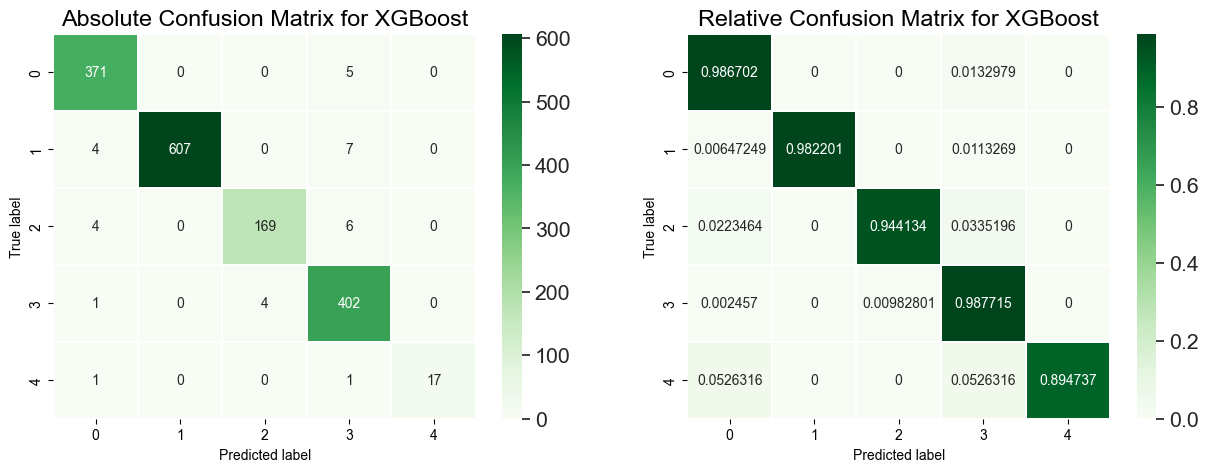

In [19]:
model = XGBoost_classification_tunned(best_hyperparams, X_train, X_test, y_train, y_test)

## Evaluation of model

               precision    recall  f1-score   support

           C2     0.9730    0.9818    0.9774       110
         CHAT     1.0000    0.9898    0.9949       197
FILE TRANSFER     1.0000    1.0000    1.0000        51
    STREAMING     0.9853    1.0000    0.9926       134
         voip     1.0000    0.8750    0.9333         8

     accuracy                         0.9900       500
    macro avg     0.9917    0.9693    0.9796       500
 weighted avg     0.9901    0.9900    0.9900       500



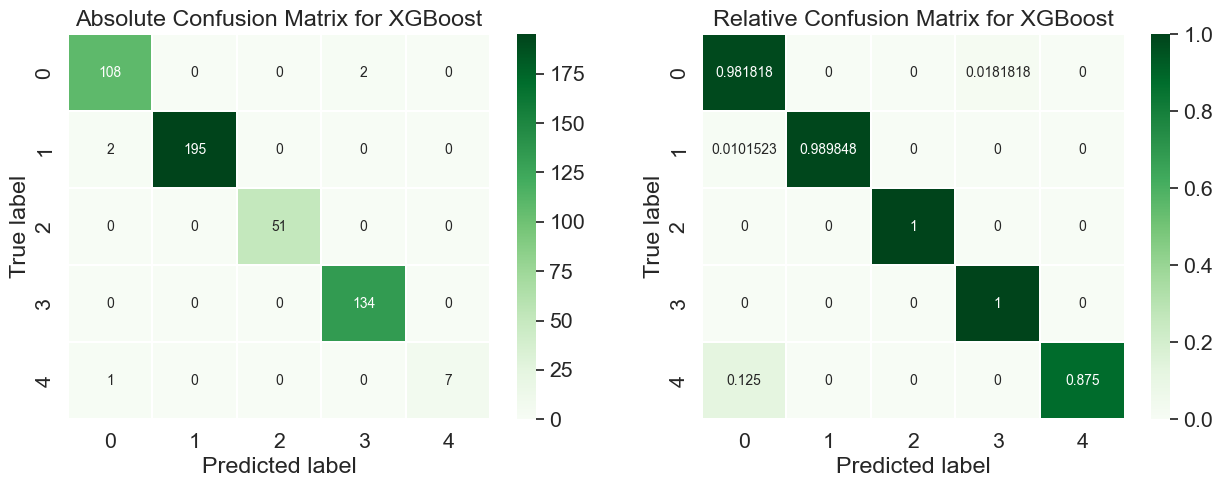

In [26]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    

y_pred = model.predict(X_validation)

report = classification_report(y_validation, y_pred, target_names=classifications_array, digits=4)
print(report)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# 94.75 & 95.71 & 96.08 & 95.90

In [27]:
import csv

problem = "VPN-VNAT-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    tmp = report.split("weighted avg")
    tmp_2 = tmp[0].split("macro avg")
    accuracy = tmp_2[0].split("accuracy")[1].split()[0]
    _ = tmp_2[1].split()
    m_precision = _[0]
    m_recall = _[1]
    m_f1 = _[2]
    _ = tmp[1].split()
    w_precision = _[0]
    w_recall = _[1]
    w_f1 = _[2]
    writer.writerow([problem, "-", accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])

# Feature importance

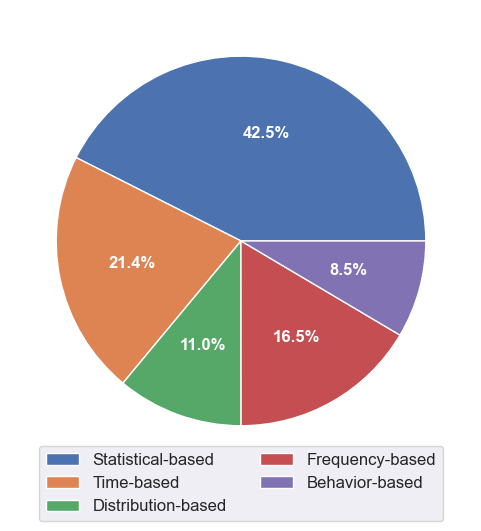

In [28]:
feat_importances = pd.Series(model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)

f_sf = feat_importances[statistics_features].sum()
f_tf = feat_importances[time_features].sum()
f_df = feat_importances[distribution_features].sum()
f_ff = feat_importances[frequency_features].sum()
f_bf = feat_importances[behavior_features].sum()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
data = [f_sf, f_tf, f_df, f_ff, f_bf]
ingredients = ["Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based"]
def func(pct, allvals):
    return "{:.1f}%".format(pct)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, ingredients,
          loc="center",
          bbox_to_anchor=(0.5, 0, 0, -0.05),
          prop={'size': 12},
          ncol=2)
plt.setp(autotexts, size=12, weight="bold")
plt.show()

In [29]:
data

[0.40691105, 0.20484771, 0.10558956, 0.15764196, 0.08138689]

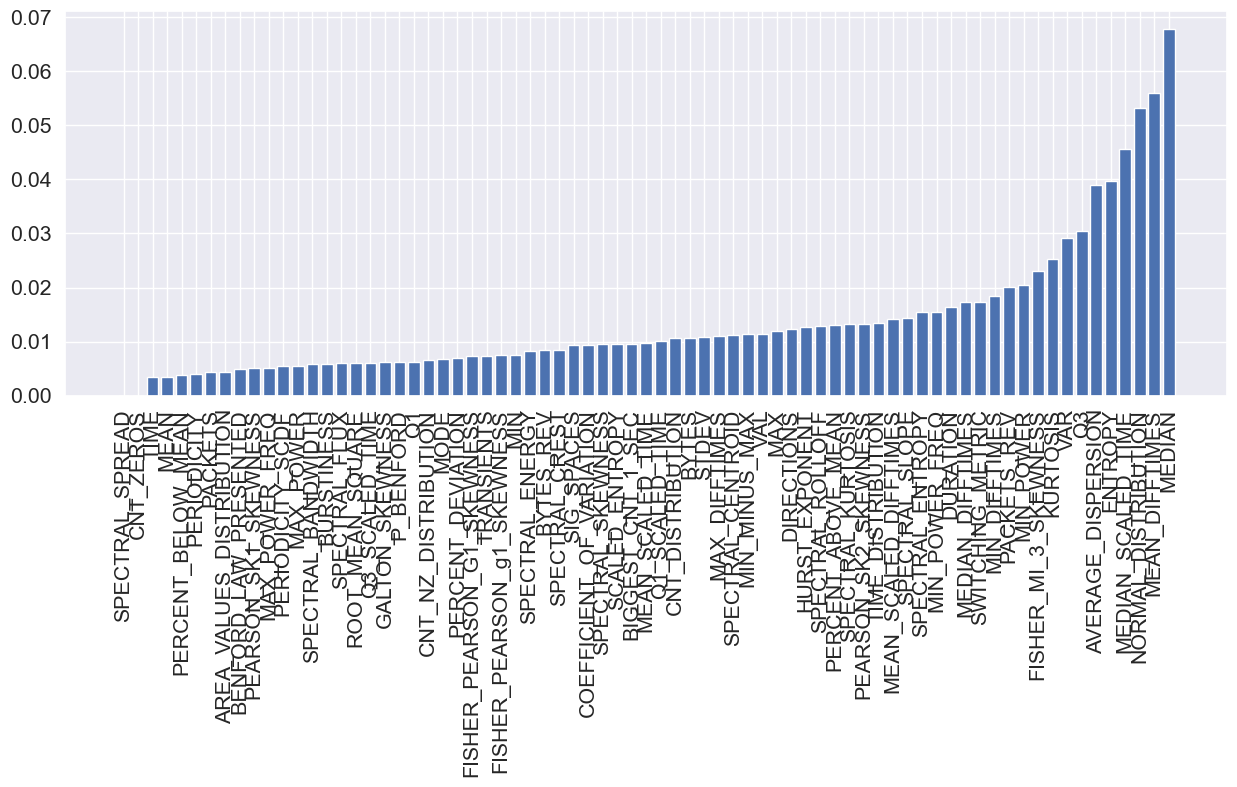

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [31]:
feat_importances

SPECTRAL_SPREAD        0.000000
CNT_ZEROS              0.000000
TIME                   0.003422
MEAN                   0.003493
PERCENT_BELOW_MEAN     0.003760
                         ...   
ENTROPY                0.039694
MEDIAN_SCALED_TIME     0.045591
NORMAL_DISTRIBUTION    0.053259
MEAN_DIFFTIMES         0.056039
MEDIAN                 0.067818
Length: 73, dtype: float32

In [32]:
feat_importances.to_dict()

{'SPECTRAL_SPREAD': 0.0,
 'CNT_ZEROS': 0.0,
 'TIME': 0.003421731060370803,
 'MEAN': 0.0034925921354442835,
 'PERCENT_BELOW_MEAN': 0.0037597762420773506,
 'PERIODICITY': 0.004006994888186455,
 'PACKETS': 0.004325995687395334,
 'AREA_VALUES_DISTRIBUTION': 0.0043546580709517,
 'BENFORD_LAW_PRESENTED': 0.00500009348616004,
 'PEARSON_SK1_SKEWNESS': 0.005059040617197752,
 'MAX_POWER_FREQ': 0.0051320623606443405,
 'PERIODICITY_SCDF': 0.0054199788719415665,
 'MAX_POWER': 0.005514280404895544,
 'SPECTRAL_BANDWIDTH': 0.005869965068995953,
 'BURSTINESS': 0.005943273659795523,
 'SPECTRAL_FLUX': 0.0060081505216658115,
 'ROOT_MEAN_SQUARE': 0.006038317456841469,
 'Q3_SCALED_TIME': 0.006065253634005785,
 'GALTON_SKEWNESS': 0.0061959512531757355,
 'P_BENFORD': 0.0062013426795601845,
 'Q1': 0.006235284265130758,
 'CNT_NZ_DISTRIBUTION': 0.006592657882720232,
 'MODE': 0.0068665663711726665,
 'PERCENT_DEVIATION': 0.007053636480122805,
 'FISHER_PEARSON_G1_SKEWNESS': 0.007299702614545822,
 'TRANSIENTS': 0.00

# FEATURE SELECTION

In [34]:
def perform_val(selected_features, cycles = 1, best_hyperparams=None):
    if best_hyperparams is None:
        best_hyperparams = tunne_together_XGBoost_classification(df_features, selected_features, verbose=False)
    X_dos=df_features[selected_features]  # Features
    y_dos=df_features['LABEL_code']  # Labels

    best = 0
    best_model = None
    for i in range(0, cycles):    
        X_train, X_test, y_train, y_test = train_test_split(X_dos, y_dos, test_size=0.30, stratify=y_dos) # 70% training and 30% test
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            )
        model.fit(X_train, y_train)                
        y_pred = model.predict(X_test)
        F1 = f1_score(y_test, y_pred, average='macro')
        if F1 > best:   
            best = F1
            best_model = model
            
    print(F1)

    X_validation=df_validation[selected_features]  # Features
    y_validation=df_validation['LABEL_code']  # Labels

    y_pred = best_model.predict(X_validation)
    
    report = classification_report(y_validation,y_pred)
    return report

In [35]:
import FEATURE_REDUCTED as FR
REPORTS = []


report = perform_val(FR.botnet_best_features)
REPORTS.append(report)
report = perform_val(FR.doh_best_features)
REPORTS.append(report)
report = perform_val(FR.dos_best_features)
REPORTS.append(report)
report = perform_val(FR.dns_malware_features)
REPORTS.append(report)
report = perform_val(FR.tor_features)
REPORTS.append(report)
report = perform_val(FR.vpn_features)
REPORTS.append(report)
report = perform_val(FR.all_best_features)
REPORTS.append(report)
report = perform_val(FR.combo_features)
REPORTS.append(report)
report = perform_val(FR.combo_2_features)
REPORTS.append(report)
report = perform_val(FR.crypto_features)
REPORTS.append(report)

100%|██████████| 100/100 [01:19<00:00,  1.26trial/s, best loss: -0.9738035020217688]
The best hyperparameters are :  

{'colsample_bytree': 0.5782484629977708, 'gamma': 1.1594964571494317, 'max_depth': 8.0, 'min_child_weight': 10.0, 'n_estimators': 200.0, 'reg_alpha': 0.0, 'reg_lambda': 0.582239563857793}
0.9509016303187885
100%|██████████| 100/100 [00:46<00:00,  2.13trial/s, best loss: -0.9812698797483147]
The best hyperparameters are :  

{'colsample_bytree': 0.7375936873860317, 'gamma': 1.0348929161149958, 'max_depth': 6.0, 'min_child_weight': 1.0, 'n_estimators': 200.0, 'reg_alpha': 0.0, 'reg_lambda': 0.1078137408315844}
0.9860786089570045
100%|██████████| 100/100 [00:39<00:00,  2.54trial/s, best loss: -0.973712641850787]
The best hyperparameters are :  

{'colsample_bytree': 0.28573410553013, 'gamma': 1.5375425666733933, 'max_depth': 8.0, 'min_child_weight': 4.0, 'n_estimators': 200.0, 'reg_alpha': 0.0, 'reg_lambda': 0.8700536441997067}
0.9709595295691702
100%|██████████| 100/100 

In [36]:
problem = "VPN-VNAT-multiclass"
with open("feature_reduction_results.csv", "a") as f:
    writer = csv.writer(f)
    for report, f_set in zip(REPORTS, FR.FEATURE_SETS):
        tmp = report.split("weighted avg")
        tmp_2 = tmp[0].split("macro avg")
        accuracy = tmp_2[0].split("accuracy")[1].split()[0]
        _ = tmp_2[1].split()
        m_precision = _[0]
        m_recall = _[1]
        m_f1 = _[2]
        _ = tmp[1].split()
        w_precision = _[0]
        w_recall = _[1]
        w_f1 = _[2]
        writer.writerow([problem, f_set, accuracy, m_precision, m_recall, m_f1, w_precision, w_recall, w_f1])